In [69]:
import numpy as np 
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [76]:
# Inverting dictionaries to map index -> Diagnosiscode
female_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/processed_mimic_female.types')
female_binary_types_inv = {v: k for k, v in female_binary_types.items()}
male_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/processed_mimic_male.types')
male_binary_types_inv = {v: k for k, v in male_binary_types.items()}
mixed_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/processed_mimic_mixed.types')
mixed_binary_types_inv = {v: k for k, v in mixed_binary_types.items()}
print(len(mixed_binary_types))
print(len(male_binary_types))
print(len(female_binary_types))

6985
848
857


In [73]:

male_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_binary.npy')
male_generated_patients = np.rint(male_generated_patients)
print(male_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
male_generated_patients_icd = np.chararray(male_generated_patients.shape, itemsize=8)            
it = np.nditer(male_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): male_generated_patients_icd[it.multi_index] = male_binary_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save male patients to csv
pd.DataFrame(male_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_binary.csv")


(10000, 848)


In [46]:
# NPY to CSV  mixed_binary_cp_801.npy
female_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_binary.npy')
female_generated_patients = np.rint(female_generated_patients)
print(female_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
female_generated_patients_icd = np.chararray(female_generated_patients.shape, itemsize=8)            
it = np.nditer(female_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): female_generated_patients_icd[it.multi_index] = female_binary_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save female patients to csv
pd.DataFrame(female_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_binary.csv")


(10000, 857)


In [47]:
mixed_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.npy')
mixed_generated_patients = np.rint(mixed_generated_patients)
print(mixed_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
mixed_generated_patients_icd = np.chararray(mixed_generated_patients.shape, itemsize=8)            
it = np.nditer(mixed_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): mixed_generated_patients_icd[it.multi_index] = mixed_binary_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save mixed patients to csv
pd.DataFrame(mixed_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.csv")


(10000, 906)


In [18]:
# Binary
mixed_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.csv')
male_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_binary.csv')
female_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_binary.csv')

In [19]:
# Invert
#males = males.T
#females = females.T
#mixed = mixed.T

In [20]:
#for i in range(855):
#    females.rename(columns={ females.columns[i]: "DIAGNOSIS_ICD" }, inplace = True)
#females.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)
#males.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)

#females.head()

In [21]:
# Binary
mixed_binary.rename(columns={mixed_binary.columns[0]: "SUBJECT_ID"}, inplace = True)
male_binary.rename(columns={male_binary.columns[0]: "SUBJECT_ID"}, inplace = True)
female_binary.rename(columns={female_binary.columns[0]: "SUBJECT_ID"}, inplace = True)

In [22]:
# Binary
mixed_binary = pd.melt(mixed_binary, id_vars=["SUBJECT_ID"])
male_binary = pd.melt(male_binary, id_vars=["SUBJECT_ID"])
female_binary = pd.melt(female_binary, id_vars=["SUBJECT_ID"])

In [23]:
# Find patient by SUBJECT_ID
#print(females_transformed.loc[females_transformed['SUBJECT_ID'] == 3])

In [24]:
# Sort rows by SUBJECT ID
mixed_diagnoses_icd = mixed_binary.sort_values(by=['SUBJECT_ID'], ascending = True)
male_diagnoses_icd = male_binary.sort_values(by=['SUBJECT_ID'], ascending = True)
female_diagnoses_icd = female_binary.sort_values(by=['SUBJECT_ID'], ascending = True)

# Drop NaN rows
mixed_diagnoses_icd = mixed_binary.dropna()
male_diagnoses_icd = male_binary.dropna()
female_diagnoses_icd = female_binary.dropna()
print(mixed_binary)

         SUBJECT_ID variable value
0                 0        0   b''
1                 1        0   b''
2                 2        0   b''
3                 3        0   b''
4                 4        0   b''
...             ...      ...   ...
9059995        9995      905   b''
9059996        9996      905   b''
9059997        9997      905   b''
9059998        9998      905   b''
9059999        9999      905   b''

[9060000 rows x 3 columns]


In [26]:
# Filter mixed patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
mixed_ischemic = mixed_diagnoses_icd[mixed_diagnoses_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
mixed_heart_disease = mixed_diagnoses_icd[mixed_diagnoses_icd.value.str.contains("b'D_429", regex=True, na=False)]
mixed_diabetes = mixed_diagnoses_icd[mixed_diagnoses_icd.value.str.contains("^b'D_25", na=False)]
mixed_ischemic_ids = mixed_ischemic["SUBJECT_ID"].tolist()
mixed_heart_disease_ids = mixed_heart_disease["SUBJECT_ID"].tolist()
mixed_diabetes_ids = mixed_diabetes["SUBJECT_ID"].tolist()

In [27]:
# Filter female patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
females_ischemic = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
females_heart_disease = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("b'D_429", regex=True, na=False)]
females_diabetes = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("^b'D_25", na=False)]
females_ischemic_ids = females_ischemic["SUBJECT_ID"].tolist()
females_heart_disease_ids = females_heart_disease["SUBJECT_ID"].tolist()
females_diabetes_ids = females_diabetes["SUBJECT_ID"].tolist()

In [28]:
# Filter male patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
males_ischemic = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
males_heart_disease = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("b'D_429", regex=True, na=False)]
males_diabetes = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("^b'D_25", na=False)]
males_ischemic_ids = males_ischemic["SUBJECT_ID"].tolist()
males_heart_disease_ids = males_heart_disease["SUBJECT_ID"].tolist()
males_diabetes_ids = males_diabetes["SUBJECT_ID"].tolist()

In [29]:
# get top 10 most ICD9-Codes for mixed patients
n = 20
mixed_diagnoses_top10 = mixed_diagnoses_icd['value'].value_counts()[:n]
print(mixed_diagnoses_top10)

b''            8951914
b'D_296.20'       3612
b'D_V45.82'       3089
b'D_997.39'       2691
b'D_401.9'        2620
b'D_715.90'       2618
b'D_596.8'        2391
b'D_410.71'       2102
b'D_774.2'        2055
b'D_250.11'       2050
b'D_593.9'        1990
b'D_996.74'       1611
b'D_996.04'       1469
b'D_518.5'        1412
b'D_428.0'        1382
b'D_412'          1373
b'D_V45.79'       1317
b'D_795.89'       1271
b'D_396.2'        1206
b'D_411.1'        1173
Name: value, dtype: int64


In [30]:
# get top 10 most ICD9-Codes for male patients
n = 20
males_ischemic_top10 = male_diagnoses_icd['value'].value_counts()[:n]
print(males_ischemic_top10)

b''            8951914
b'D_296.20'       3612
b'D_V45.82'       3089
b'D_997.39'       2691
b'D_401.9'        2620
b'D_715.90'       2618
b'D_596.8'        2391
b'D_410.71'       2102
b'D_774.2'        2055
b'D_250.11'       2050
b'D_593.9'        1990
b'D_996.74'       1611
b'D_996.04'       1469
b'D_518.5'        1412
b'D_428.0'        1382
b'D_412'          1373
b'D_V45.79'       1317
b'D_795.89'       1271
b'D_396.2'        1206
b'D_411.1'        1173
Name: value, dtype: int64


In [31]:
# get top 10 most ICD9-Codes for female patients
n = 20
females_diagnoses_top10 = female_diagnoses_icd['value'].value_counts()[:n]
print(females_diagnoses_top10)

b''                                 106229
b'\x00\x00\x00\x00\x00\x00\x003'      7135
b'\x00\x00\x003'                      6756
b'\x00\x00\x00\x00\x00\x00\xc03'      5697
b'\x00\x00\x00\x00\x00\x00\x803'      5652
b'\x00\x00\x803'                      5423
b'\x00\x00\xc03'                      5412
b'\x00\x00\x00\x00\x00\x00\x004'      4534
b'\x00\x00\x004'                      4267
b'D_72'                               3209
b'D_85'                               3159
b'D_01'                               3121
b'\x00\x00\x00\x00\x00\x00@4'         2945
b'\x00\x00\x00\x00\x00\x00 4'         2917
b'\x00\x00@4'                         2880
b'D_84'                               2716
b'\x00\x00 4'                         2681
b'\x00\x00\x00\x00\x00\x00`4'         2527
b'\x00\x00\x00\x00\x00\x00\x804'      2364
b'D_28'                               2324
Name: value, dtype: int64


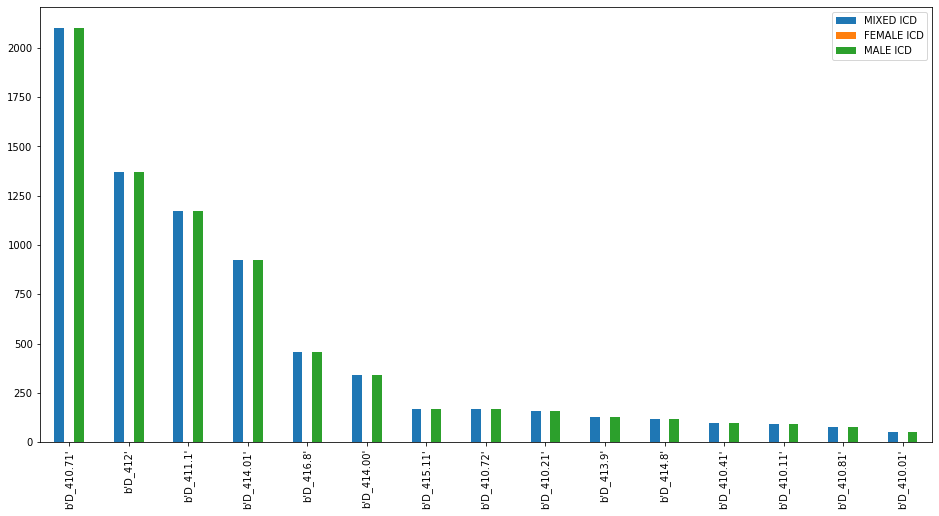

In [32]:
# Compare top n ICD9-Codes occurences for ischemic diseases
n = 50

graph_df = mixed_ischemic['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_ischemic['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_ischemic['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

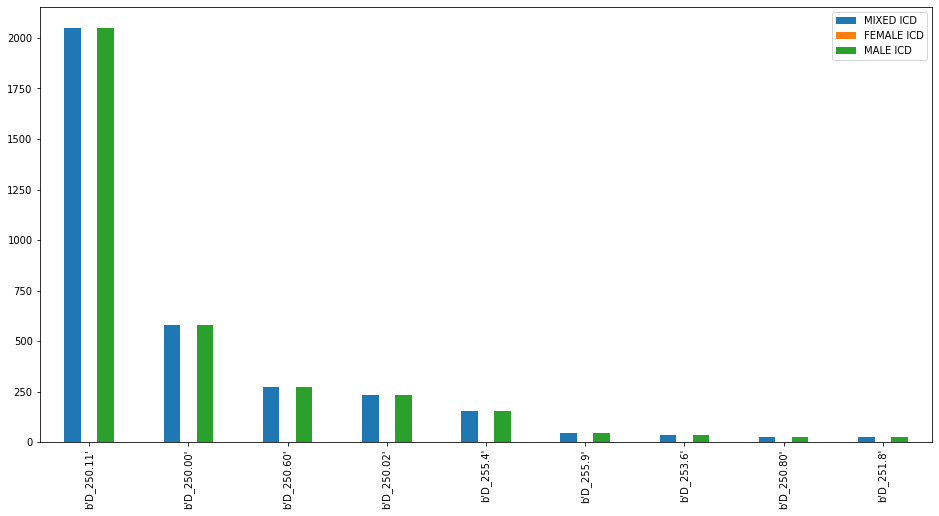

In [33]:
# Compare top n ICD9-Codes occurences for diabetic diseases
n = 50

graph_df = mixed_diabetes['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_diabetes['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_diabetes['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [34]:
# Get ids of mixed patients with heart disease + any type of diabetes
mixed_heart_and_diabetes = mixed_diagnoses_icd[mixed_diagnoses_icd["SUBJECT_ID"].isin(mixed_ischemic_ids)]
mixed_heart_and_diabetes = mixed_heart_and_diabetes[mixed_heart_and_diabetes ["SUBJECT_ID"].isin(mixed_diabetes_ids)]
mixed_heart_and_diabetes["SUBJECT_ID"].nunique() 

1653

In [35]:
# Get ids of male patients with heart disease + any type of diabetes
males_heart_and_diabetes = male_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_ischemic_ids)]
males_heart_and_diabetes = males_heart_and_diabetes[males_heart_and_diabetes ["SUBJECT_ID"].isin(males_diabetes_ids)]
males_heart_and_diabetes["SUBJECT_ID"].nunique() 

1653

In [36]:
# Get ids of female patients with heart disease + any type of diabetes
females_heart_and_diabetes = female_diagnoses_icd[female_diagnoses_icd["SUBJECT_ID"].isin(females_ischemic_ids)]
females_heart_and_diabetes = females_heart_and_diabetes[females_heart_and_diabetes ["SUBJECT_ID"].isin(females_diabetes_ids)]
females_heart_and_diabetes["SUBJECT_ID"].nunique() 

192

In [37]:
mixed_transformed.shape

NameError: name 'mixed_transformed' is not defined